### Basic steps of setting up a pytorch model
Preprocessing of data is outside the scope of this tutorial. However, the input is expect to be some torch tensor type. Therefore there are some introductory tensor and torch Variable manipulations listed below.
1. __Working with Torch tensors__ 
2. __Working with Torch Variables__ 
3. __Computing the gradients:__ using Torch Variables
4. __Loss function and Optimizer:__ Logistic Regression example (Cross Entropy)
5. __Data__: Using the pytorch dataloader class

6. __Building a model__:
  * __STEP 1 - Define model__
  * __STEP 2 - Instantiate model__ 
  * __STEP 3 - Loss and optimiser __ 
  * __STEP 4 - Train __ using the given loss function and optimiser
  * __STEP 5 - Predict__ use the trained network to make predictions on unseen input. Subsequently calculate the losses, accuracy, etc..


### 1 - Working with torch tensors

In [1]:
import torch

# every seed produces the same random array
torch.manual_seed(0)
tensor_1 = torch.rand(2,2)

tensor_2 = torch.rand(2,2)

torch.manual_seed(0)
tensor_3 = torch.rand(2,2)

print('Random tensor as seed 0:', tensor_1)
print('Different random tensor without seed 0:',tensor_2)
print('Same tensor as the first one, because we use seed 0:',tensor_3)


Random tensor as seed 0: 
 0.5488  0.5928
 0.7152  0.8443
[torch.FloatTensor of size 2x2]

Different random tensor without seed 0: 
 0.6028  0.8579
 0.5449  0.8473
[torch.FloatTensor of size 2x2]

Same tensor as the first one, because we use seed 0: 
 0.5488  0.5928
 0.7152  0.8443
[torch.FloatTensor of size 2x2]



In [2]:
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
    tensor_4 = torch.rand(2,2).cuda()

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
    tensor_5 = torch.rand(2,2).cuda()
    
print('Random tensor as seed 0:', tensor_4)
print('Random tensor as seed 0:', tensor_5)

Random tensor as seed 0: 
 0.6028  0.8579
 0.5449  0.8473
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Random tensor as seed 0: 
 0.4237  0.6236
 0.6459  0.3844
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



In [3]:
# Tensors on CPU vs GPU

if torch.cuda.is_available():
    tensor_1 = tensor_1.cuda()  # convert to gpu tensor with .cuda()

print(type(tensor_1))

tensor_1 = tensor_1.cpu()  # back to CPU with .cpu()
print(type(tensor_1))

<class 'torch.cuda.FloatTensor'>
<class 'torch.FloatTensor'>


#### (re)size


In [4]:
print(tensor_1.size())
print(tensor_1)
print(tensor_1.view(4).size())
print(tensor_1.view(4))


torch.Size([2, 2])

 0.5488  0.5928
 0.7152  0.8443
[torch.FloatTensor of size 2x2]

torch.Size([4])

 0.5488
 0.5928
 0.7152
 0.8443
[torch.FloatTensor of size 4]



###### inplace is faster due to memory efficiency

In [5]:
%timeit tensor_4 - tensor_5

5.25 µs ± 42.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%timeit tensor_4.sub(tensor_5)

4.79 µs ± 72.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%timeit tensor_4.sub_(tensor_5)

3.3 µs ± 6.72 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


###### subtract

In [8]:
print(tensor_1.size()) 
print(type(tensor_4)) # size works the same on cuda tensors
print(tensor_4.size())

torch.Size([2, 2])
<class 'torch.cuda.FloatTensor'>
torch.Size([2, 2])


In [9]:
print(tensor_4.add(tensor_1.cuda())) # to add two tensor, they have to be the same type
print(tensor_1.add(torch.rand(2,2).float())) # both GPU/CPU and float/long/double


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]


 0.9864  0.8904
 1.6070  0.9010
[torch.FloatTensor of size 2x2]



In [10]:
print(tensor_4.sub(tensor_5))
print(tensor_4)                 # sub subtracts tensor_4 with tensor_5 == tensor_4 - tensor_5
print(tensor_4.sub_(tensor_5))
print(tensor_4)                 # sub_ replaces tensor_4 with tensor_5


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]


1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



###### multiply elementwise

In [11]:
print('tensor_4:',tensor_4)
print('tensor_5:',tensor_5)
# mul multiplies tensor_4 with tensor_5 == tensor_4 - tensor_5
print('Multiply elementwise:',tensor_4.mul(tensor_5))    
print('Multiply elementwise:',tensor_4 * tensor_5)
    # mul_ without using additional memory 
print('Multiply inplace:',tensor_4.mul_(tensor_5))    
    

tensor_4: 
1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

tensor_5: 
 0.4237  0.6236
 0.6459  0.3844
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Multiply elementwise: 
1.00000e+05 *
 -1.4629 -3.1606
 -3.4042 -1.2002
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Multiply elementwise: 
1.00000e+05 *
 -1.4629 -3.1606
 -3.4042 -1.2002
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Multiply inplace: 
1.00000e+05 *
 -1.4629 -3.1606
 -3.4042 -1.2002
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



###### division elementwise

In [12]:
print('tensor_4:',tensor_4)
print('tensor_5:',tensor_5)
# mul multiplies tensor_4 with tensor_5 == tensor_4 - tensor_5
print('Divide elementwise:',tensor_4.div(tensor_5))    
print('Divide elementwise:',tensor_4 / tensor_5)
    # mul_ without using additional memory 
print('Divide inplace:',tensor_4.div_(tensor_5))    

tensor_4: 
1.00000e+05 *
 -1.4629 -3.1606
 -3.4042 -1.2002
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

tensor_5: 
 0.4237  0.6236
 0.6459  0.3844
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Divide elementwise: 
1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Divide elementwise: 
1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

Divide inplace: 
1.00000e+05 *
 -3.4531 -5.0686
 -5.2706 -3.1224
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



In [13]:
# mean
print('mean:', tensor_4.mean(dim=0))

# standard deviation
print('std deviation:', tensor_4.std(dim=0))

mean: 
1.00000e+05 *
 -4.3618
 -4.0955
[torch.cuda.FloatTensor of size 2 (GPU 0)]

std deviation: 
1.00000e+05 *
  1.2852
  1.3762
[torch.cuda.FloatTensor of size 2 (GPU 0)]



### 2 - Working with torch Variables
* A variable wraps a Tensor, this enables accumulation of gradients

In [14]:
import torch
from torch.autograd import Variable

In [15]:
var_a = Variable(torch.ones(2,2), requires_grad=True)
var_a

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [16]:
var_b = Variable(torch.ones(2,2), requires_grad=True)
print(var_a + var_b)
# same add, sub, mul, div operations can be applied 
print(torch.mul(var_a, var_b))

Variable containing:
 2  2
 2  2
[torch.FloatTensor of size 2x2]

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [17]:
# But not in place! Why?
# Because "mul_ only supports scalar multiplication"
print(var_a.mul_(var_b))

RuntimeError: mul_ only supports scalar multiplication

## 3 - Gradients

requires_grad enables calculation of gradients for Variables
* Define original equation
* Substitute equation with x
* Reduce to scalar output using mean > o
* Calculate gradients > o.backward()
* Access the gradients using x.grad

In [34]:
x = Variable(torch.ones(2), requires_grad=True)
x

Variable containing:
 1
 1
[torch.FloatTensor of size 2]

In [35]:
y = 5 * (x + 1) ** 2
y

Variable containing:
 20
 20
[torch.FloatTensor of size 2]

In [36]:
o = (1/2) * torch.sum(y)
o

Variable containing:
 20
[torch.FloatTensor of size 1]

In [29]:
# calculate the gradients for variables involved in o
print(o.backward())


None


In [32]:
# the gradients are stored in the Variable
x.grad

Variable containing:
 10
 10
[torch.FloatTensor of size 2]

In [37]:
o.backward(torch.FloatTensor([1.0,1.0]))
x.grad

Variable containing:
 10
 10
[torch.FloatTensor of size 2]

### 4 - Loss function and optimizer
######  Logistic Regression example with Pytorch
Bring together some of the previously introduced ideas in a simple application
 
* **Linear function**:
  * $y = A X + \beta $
  * with matrix $A$ the weights and $\beta$ the bias 
    * dimensions of $A$: *output_dim x input_dim*
    * dimensions of $\beta$: *output_dim x 1*

$g = \frac{1}{1+e^{-y}} = \frac{1}{1+e^{A X + \beta}} \to $ estimated probability that $y = 1$ given $x$


***Optimising using Cross-entropy $D()$***

$D(S,L) = L * log(S)-(1-L) *log(1-S)$
* if $ L = 0 $ (for a specific label)
  * $D(S,O) = -log(1-S)$
    * $-log(1-S)$ : less positive if $S \to 0$
    * $-log(1-S)$ : more positive if $S \to 1$ (bigger loss!)
* if $ L = 1 $ (for a specific label)
  * $D(S,1) = -log(S)$
    * $-log(S)$ : less negative if $S \to 1$
    * $-log(S)$ : more negative if $S \to 0$ (bigger loss!)
    
**Goal** is to minimise the cross entropy loss
* $L = \frac{1}{N}\sum_i{D(g(Ax_i+b), L_i)}$
  * minimise the overall distance D 
  * linear function $y \to$ logistic function $S = g(y) \to$ cross entropy function $D(S,L)$

In [147]:
import math
print('-log(1-S) with S near 0, very small:\n',-math.log(1-.000000001))
print('-log(1-S) with S near 1, relatively big:\n',-math.log(1-.999999999))

print('log(S) with S near 1, very small:\n',math.log(.999999999))
print('log(S) with S near 0, relatively big:\n',math.log(.000000001))


-log(1-S) with S near 0, very small:
 9.999999722180686e-10
-log(1-S) with S near 1, relatively big:
 20.723265865228342
log(S) with S near 1, very small:
 -9.999999722180686e-10
log(S) with S near 0, relatively big:
 -20.72326583694641


### 5 -  Data using the pytorch dataloader class

In [148]:
import torch
import torch.nn as nn
from torch.autograd import Variable

# vision dataset imports
import torchvision.transforms as transforms
import torchvision.datasets as dsets


In [150]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

Processing...
Done!


In [151]:
len(train_dataset)

60000

In [158]:
# image with 28 by 28 pixels
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [159]:
# label for the first image
train_dataset[0][1]

5

In [166]:
batch_size = 100
n_iters = 3000

num_epochs = int(n_iters / (len(train_dataset) / batch_size))
num_epochs

5

In [167]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                           shuffle=True)

In [168]:
# check iterability of trainingset
import collections
isinstance(train_loader, collections.Iterable)

True

In [170]:
test_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                           shuffle=False)

#### STEP 1 - CREATE THE MODEL CLASS

In [176]:
class Logreg(nn.Module):
    def __init__(self, input_size, output_size):
        super(Logreg, self).__init__()
        # linear layer
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### STEP 2 - INSTANTIATE THE MODEL CLASS

In [219]:
# input dimensionality has to be the same as the image size!
input_dim = 28 * 28
# labels 0-9
output_dim = 10

model = Logreg(input_dim, output_dim * batch_size)

if torch.cuda.is_available():
    model.cuda()

#### STEP 3 - LOSS AND OPTIMIZER

In [220]:
# loss function
criterion = nn.CrossEntropyLoss()

# how are you updating the parameters for every epoch?
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [221]:
# print the parameters 
print(model.parameters())
print(len(list(model.parameters()))) # amount of layers

# FC 1 parameters
print('alpha:\n',list(model.parameters())[0].size()) # linear layer parameters
# FC 1 bias parameters
print('beta:\n',list(model.parameters())[1].size()) # output layer parameters

<generator object Module.parameters at 0x7f048db3f0a0>
2
alpha:
 torch.Size([10, 784])
beta:
 torch.Size([10])


#### STEP 4 - TRAIN THE MODEL

In [222]:
# print sizes of shizzle if the model doesn't like you
for i, (images, labels) in enumerate(train_loader):
    if i == 1:
        print(images.view(-1,28*28).size())

torch.Size([100, 784])


In [229]:
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # convert input data to torch Variable
        if torch.cuda.is_available():
            # .cuda() has to be applied to the Tensor, not the Variable!
            images = Variable(images.view(-1,28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1,28*28))
            labels = Variable(labels)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward run to get outputs
        outputs = model(images)

        # Calculate loss w.r.t labels (Softmax and CrossEntropy in a single step)
        loss = criterion(outputs, labels)

        # Compute gradients w.r.t. parameters
        loss.backward()

        # Update parameters
        optimizer.step()

        iter += 1
        # compute the accuracy
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                # Load images to a Torch Variable
                if torch.cuda.is_available():
                    images = Variable(images.view(-1,28*28).cuda())
                else:
                    images = Variable(images.view(-1,28*28))

                # Forward pass to get outputs
                outputs = model(images)

                # Get predictions from the arg max                      
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            print('Iteration: {} \t Loss {:.4f} \t Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500 	 Loss 0.6911 	 Accuracy: 86.34833333333333
Iteration: 1000 	 Loss 0.6799 	 Accuracy: 86.46666666666667
Iteration: 1500 	 Loss 0.7793 	 Accuracy: 86.56833333333333
Iteration: 2000 	 Loss 0.6045 	 Accuracy: 86.61
Iteration: 2500 	 Loss 0.4437 	 Accuracy: 86.715
Iteration: 3000 	 Loss 0.6233 	 Accuracy: 86.82166666666667


#### STEP 5 - PREDICT LABELS FOR TEST SET

In [233]:
# seems like a lot of additional work to move back and forth from/to gpu
if torch.cuda.is_available:
    predicted = model(Variable(test_loader.items().view(-1,28*28).cuda())).cpu().data.numpy()
else:
    predicted = model(Variable(test_loader[:][:]).data.numpy())
print(predicted)

AttributeError: 'DataLoader' object has no attribute 'items'

In [98]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

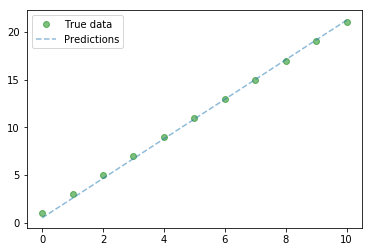

In [130]:
# clear plot
plt.clf()

# plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=.5)

# plot predictions 
plt.plot(x_train, predicted, '--', label='Predictions', alpha=.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [139]:
save_model = True
if save_model is True:
    # save only parameters
    torch.save(model.state_dict(), 'saved_shitty_test_model.pkl')

In [141]:
load_model = True
if load_model is True:
    model.load_state_dict(torch.load('saved_shitty_test_model.pkl'))